In [3]:
import numpy
from pyearth import Earth
from pyearth import export

# Create some fake data
numpy.random.seed(2)
m = 1000
n = 10
X = 10 * numpy.random.uniform(size=(m, n)) - 40
y = 100 * \
    (numpy.sin((X[:, 6])) - 4.0) + \
    10 * numpy.random.normal(size=m)

# Fit an Earth model
model = Earth(max_degree=2, minspan_alpha=.5, verbose=False)
model.fit(X, y)

print(model.summary())

#return sympy expression
print('Resulting sympy expression:')
print(export.export_sympy(model))

Earth Model
----------------------------------------------------
Basis Function                 Pruned  Coefficient  
----------------------------------------------------
(Intercept)                    No      -748.773     
h(x6+36.8964)                  Yes     None         
h(-36.8964-x6)                 No      98.2409      
h(x6+33.7644)*h(x6+36.8964)    No      24.5981      
h(-33.7644-x6)*h(x6+36.8964)   Yes     None         
h(x6+38.8328)*h(-36.8964-x6)   No      -70.8659     
h(-38.8328-x6)*h(-36.8964-x6)  No      87.1087      
h(x6+32.7734)                  No      -250.346     
h(-32.7734-x6)                 No      81.1618      
h(x6+30.8809)*h(x6+32.7734)    No      -56.3355     
h(-30.8809-x6)*h(x6+32.7734)   No      24.8938      
h(x6+34.5078)*h(x6+36.8964)    No      20.6931      
h(-34.5078-x6)*h(x6+36.8964)   Yes     None         
h(x6+37.4374)*h(-32.7734-x6)   No      39.4317      
h(-37.4374-x6)*h(-32.7734-x6)  No      -50.3164     
----------------------------------

In [ ]:
Plot Absolute valued Function
    

Beginning forward pass
-------------------------------------------------------------------
iter  parent  var  knot  mse         terms  gcv      rsq    grsq   
-------------------------------------------------------------------
0     -       -    -     141.234045  1      141.517  0.000  0.000  
1     0       20   775   1.083975  3      1.097  0.992  0.992  
2     0       20   229   1.051280  5      1.075  0.993  0.992  
---------------------------------------------------------------
Stopping Condition 2: Improvement below threshold
Beginning pruning pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   5      1.05  1.075  0.993  0.992  
1     4   4      1.05  1.069  0.993  0.992  
2     1   3      1.06  1.070  0.993  0.992  
3     3   2      82.31  82.892  0.417  0.414  
4     2   1      141.23  141.517  0.000  0.000  
------------------------------------------------
Selected iteration: 1
For

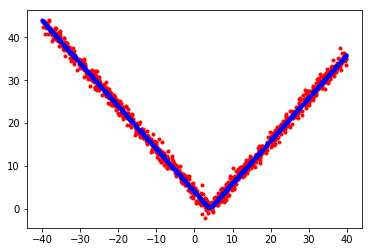

1.0018616333926*Max(0, -x20 + 3.59324717876233) + 0.714948227753838*Max(0, x20 - 4.5952434900279) + 0.285564654054911*Max(0, x20 - 3.59324717876233) + 0.309489381306281


In [9]:
import numpy
import matplotlib.pyplot as plt
from pyearth import Earth

# Create some fake data
numpy.random.seed(2)
m = 1000
n = 30
X = 80 * numpy.random.uniform(size=(m, n)) - 40
y = numpy.abs(X[:, 20] - 4.0) + 1 * numpy.random.normal(size=m)

# Fit an Earth model
model = Earth(max_degree=1, verbose=True)
model.fit(X, y)

# Print the model
print(model.trace())
print(model.summary())

# Plot the model
y_hat = model.predict(X)
plt.figure()
plt.plot(X[:, 20], y, 'r.')
plt.plot(X[:, 20], y_hat, 'b.')
plt.show()
print(export.export_sympy(model))